In [ ]:
#%load_ext autoreload

import pybamm
import matplotlib.pyplot as plt
model=pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model)
sim.solve([0,3600])
pybamm.dynamic_plot(sim)
# plt.show()
# pybamm.(sim)
#model.variable_names()

In [ ]:
output_variables = ["Voltage [V]"]
sim.plot(output_variables=output_variables)

In [ ]:
sim.plot_voltage_components()

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [ ]:
#%autoreload 2
import pybamm.input.parameters.lithium_ion.NMC_TV2023

pybamm.ParameterValues("NMC2023")

In [ ]:
import pybamm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
model=pybamm.lithium_ion.SPMe()

df = pd.read_excel("C:/UMICh/Winter_Capstone/DC_.xlsx")
df["Current"]=df["Current"]*-1
Drive_Cycle=df.to_numpy()
# Experiment=pybamm.experiment([pybamm.step.current(1,duration="5 hour", termination="2.5V")])
parameters1=pybamm.ParameterValues("NMC2023")                  
t = np.linspace(0, 1, 60)
sin_t = 0.5 * np.sin(2 * np.pi * t)
drive_cycle_power = np.column_stack([t,sin_t])
experiment = pybamm.Experiment([(pybamm.step.current(Drive_Cycle, duration="2 hour", termination="2.5 V"), "Charge at .3 C until 4.1V",
                             "Hold at 4.1 V until 25 mA")]*1)

# experiment = pybamm.Experiment([(pybamm.step.current(3, duration="3 hour", termination="2.5 V"), "Charge at .3 C until 4.2V",
#                                "Hold at 4.2 V until 25 mA")*50,
#                                ("Charge at .3C until 4.2 V","Hold at 4.2 V until 25 mA",
#                                 "Rest for 30 minutes", "Discharge at .2C until 2.5V","Rest for 30 minutes",
#                                 )*2]*40)
sim = pybamm.Simulation(model, experiment=experiment,parameter_values=parameters1)
sim.solve()
sim.plot()
# "Charge at 1 C until 4.1V",
#  "Hold at 4.1 V until 25 mA")]*1
# ,"Rest for 1 hour"
# sim = pybamm.Simulation(model,experiment=Experiment)
# sim.solve()
#pybamm.dynamic_plot(sim)

In [ ]:
import pybamm
pybamm.ParameterValues("NMC2023")

In [ ]:
import pybamm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models=[pybamm.lithium_ion.SPM(),pybamm.lithium_ion.SPMe(),pybamm.lithium_ion.DFN()]

NMC_parameters=pybamm.ParameterValues("NMC2023")
Crate=[.24,2.4,4.8,9.6,14.4,24]

# Ex=pybamm.experiment([("Discharge at 1C till 2.5V",
#                       "Hold for 20 minutes",
#                       "Charge at .3C till 4.2V",
#                       "Charge at 4.2V till 25mA")]*2)
labels=["SPM", "SPMe", "DFN"]
list=[]
for k in range(2):
    for h in range(3):
        list.append((k,h))

fig, axs = plt.subplots(2,3)
fig.suptitle('Comparison of different c-rates')
fig2,axs2=plt.subplots(2,3)


for j in range(6):
    for model,lab in zip(models,labels):
        experiment_name= pybamm.Experiment([(pybamm.step.current(Crate[j], duration="5 hour", termination="2.5 V"))]*1)
        sim = pybamm.Simulation(model, experiment=experiment_name,parameter_values=NMC_parameters,)
        sol=sim.solve()
        time = sol["Time [s]"].entries
        voltage = sol["Voltage [V]"].entries
        EC=sol["Electrolyte concentration concatenation [mol.m-3]"].entries
        x=sol["x [m]"].entries   
        axs2[list[j]].plot(x,EC,label=lab)
        axs2[list[j]].legend(loc='upper right')
        axs2[list[j]].set_title(f'C-rate: {Crate[j]/4.8} C')   
        axs[list[j]].plot(time,voltage,label=lab)
        axs[list[j]].legend(loc='upper right')
        axs[list[j]].set_title(f'C-rate: {Crate[j]/4.8} C')


plt.tight_layout()

# Add a legend

# axs.set_xlabel("Time [s]", fontsize=15)
# axs.set_ylabel("Voltage [V]", fontsize=15)
plt.show()

# plt.xlabel("Time [s]", fontsize=15)
# plt.ylabel("Voltage [V]", fontsize=15)
# plt.legend(fontsize=15)
# plt.title("1C discharge")
# plt.show()

# # plt.plot(time, voltage, lw=2, label=lab)  

    

In [ ]:
pybamm.ParameterValues("Chen2020").search("Electrolyte")

In [ ]:
import pybamm
model=pybamm.lithium_ion.DFN()
model.variables.keys()

In [ ]:
import pybamm as pb
import numpy as np

pb.set_logging_level("INFO")

models = [
    pb.lithium_ion.SPM({"SEI": "reaction limited"}),
    pb.lithium_ion.SPMe({"SEI": "reaction limited"}),
    pb.lithium_ion.SPM(
        {"SEI": "reaction limited", "surface form": "algebraic"},
        name="Algebraic SPM",
    ),
    pb.lithium_ion.SPMe(
        {"SEI": "reaction limited", "surface form": "algebraic"},
        name="Algebraic SPMe",
    ),
    pb.lithium_ion.DFN({"SEI": "reaction limited"}),
]

sims = []
for model in models:
    parameter_values = model.default_parameter_values

    parameter_values["Current function [A]"] = 0

    sim = pb.Simulation(model, parameter_values=parameter_values)

    solver = pb.CasadiSolver(mode="fast")

    years = 30
    days = years * 365
    hours = days * 24
    minutes = hours * 60
    seconds = minutes * 60

    t_eval = np.linspace(0, seconds, 100)

    sim.solve(t_eval=t_eval, solver=solver)
    sims.append(sim)

pb.dynamic_plot(
    sims,
    [
        "Voltage [V]",
        "Negative particle surface concentration",
        "X-averaged negative particle surface concentration",
        "Electrolyte concentration [mol.m-3]",
        "Negative total SEI thickness [m]",
        "X-averaged negative total SEI thickness [m]",
        "X-averaged negative SEI concentration [mol.m-3]",
        "Sum of x-averaged negative electrode volumetric "
        "interfacial current densities [A.m-3]",
        "Loss of lithium inventory [%]",
        ["Total lithium lost [mol]", "Loss of lithium to negative SEI [mol]"],
    ],
)

In [2]:
import pybamm

models=[pybamm.lithium_ion.SPMe({"SEI": "solvent-diffusion limited"},name="Only SEI"),pybamm.lithium_ion.SPMe({"SEI": "solvent-diffusion limited", "lithium plating": "partially reversible"}, name="SEI+Plating"),
                                pybamm.lithium_ion.SPMe({"SEI": "solvent-diffusion limited", "SEI on cracks": "true", "particle mechanics": "swelling and cracking"
                                },name="SEI+Crack+Plating")]
                               

# pybamm.lithium_ion.SPMe({"SEI": "solvent-diffusion limited", "lithium plating": "partially reversible"}, name="SEI+Plating"),
#                                pybamm.lithium_ion.SPMe({"SEI": "solvent-diffusion limited", "SEI on cracks": "true", "particle mechanics": "swelling and cracking"
#                                },name="SEI+Crack+Plating"
ex=pybamm.Experiment(
    [
        ("Discharge at 1C for 10 hours or until 3.3 V",
         "Rest for 1 hour",
        "Charge at 1 A until 4.1 V",
        "Hold at 4.1 V until 50 mA",
        "Rest for 1 hour")
    ]*300
)

parameter=pybamm.ParameterValues("OKane2022")

sims=[]
for model in models:
    sim=pybamm.Simulation(model,experiment=ex,parameter_values=parameter)
    sol=sim.solve()
    sims.append(sol)

KeyboardInterrupt: 

In [ ]:
import pybamm
pybamm.ParameterValues("OKane2022")

ValueError: 'Okane2022' is not a valid parameter set. Parameter set must be one of:
Ai2020
Chayambuka2022
Chen2020
Chen2020_composite
ECM_Example
Ecker2015
Ecker2015_graphite_halfcell
MSMR_Example
Marquis2019
Mohtat2020
NCA_Kim2011
NMC2023
OKane2022
OKane2022_graphite_SiOx_halfcell
ORegan2022
Prada2013
Ramadass2004
Sulzer2019
Xu2019

In [ ]:
for sim in sims:
    pybamm.plot_summary_variables(sim)

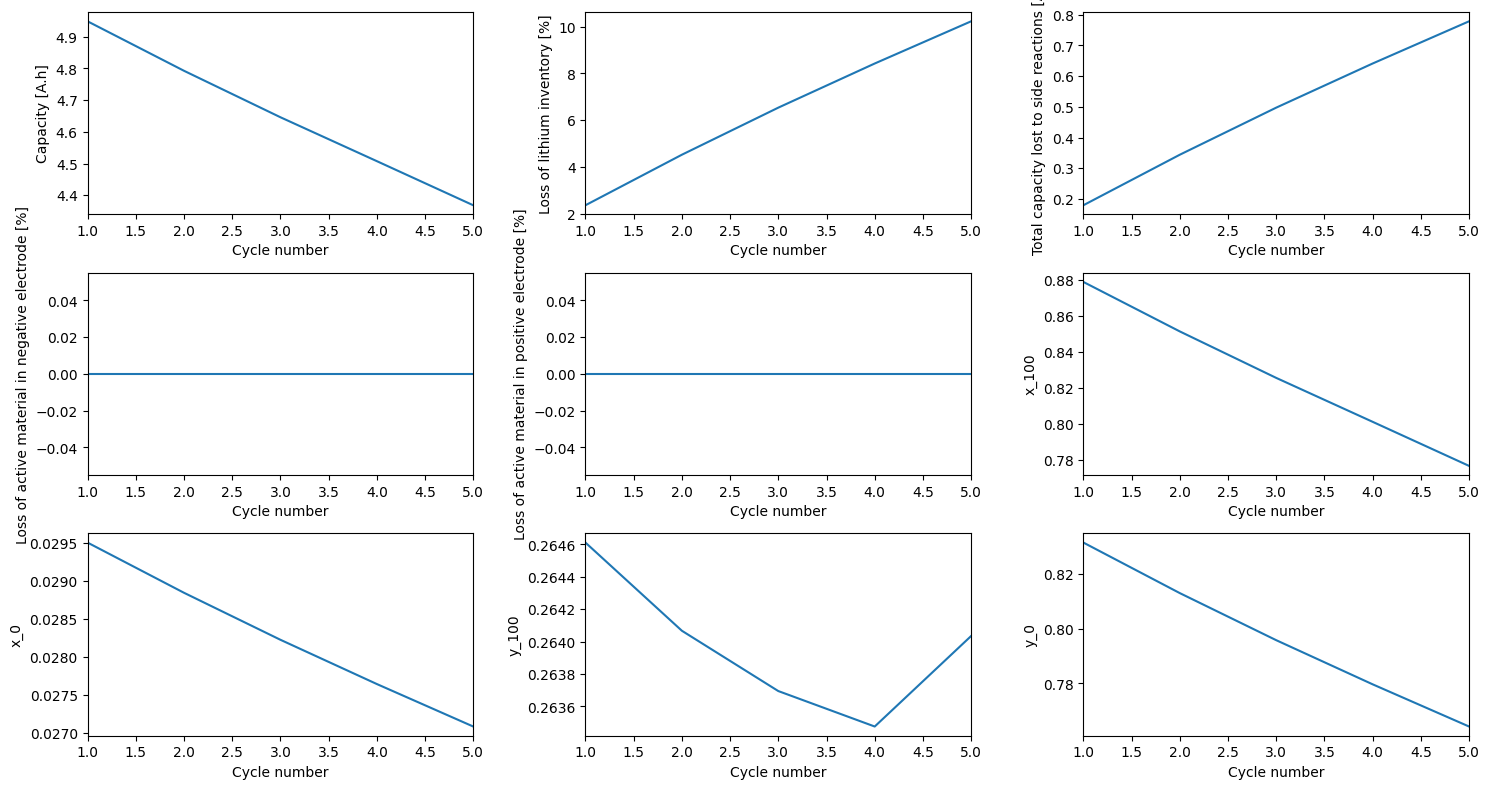

interactive(children=(FloatSlider(value=0.0, description='t', max=29.713860282205548, step=0.2971386028220555)…

In [101]:
import pybamm
import matplotlib.pyplot as plt

model=[pybamm.lithium_ion.SPM({"SEI":"solvent-diffusion limited"},name="SEI"),pybamm.lithium_ion.SPM({"SEI":"solvent-diffusion limited","lithium plating":"irreversible"},name="Plating and SEI")]

experiment=pybamm.Experiment([("Discharge at 1C until 3V",
                              "Rest for 1 hour",
                              "Charge at .4C until 4.2 V",
                              "Hold at 4.2V until 25mA",
                              "Rest for 1 hour")]*5)
parameter=pybamm.ParameterValues("OKane2022")

sim=pybamm.Simulation(model[1],experiment=experiment,parameter_values=parameter)
sol=sim.solve()
pybamm.plot_summary_variables(sol)

pybamm.dynamic_plot(sol,
    [
        "Voltage [V]",
        "Negative particle surface concentration",
        "X-averaged negative particle surface concentration",
        "Electrolyte concentration [mol.m-3]",
        "Negative total SEI thickness [m]",
        "X-averaged negative total SEI thickness [m]",
        "X-averaged negative SEI concentration [mol.m-3]",
        "Sum of x-averaged negative electrode volumetric "
        "interfacial current densities [A.m-3]",
        "Loss of lithium inventory [%]",
        ["Total lithium lost [mol]", "Loss of lithium to negative SEI [mol]"],
    ],)

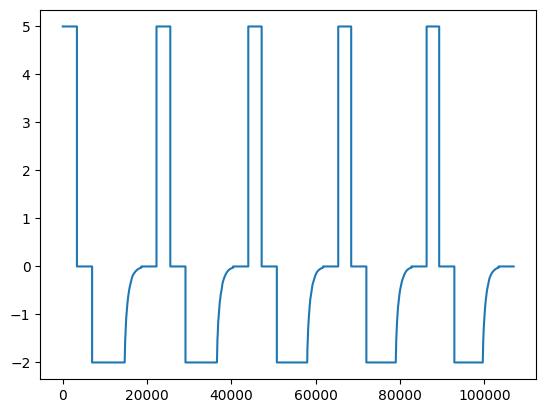

In [98]:
import numpy as np
import matplotlib.pyplot as plt
time=sol["Time [s]"].entries
current=sol["Current [A]"].entries
positive_current=np.where(current>0,current,0)
dt=np.diff(time)
discahrge_throughput=np.cumsum(positive_current[:-1]*dt)

plt.plot(time,current)


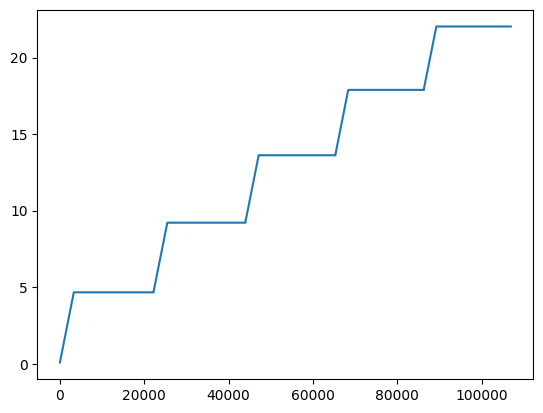

In [99]:
discahrge_throughput=discahrge_throughput/3600

plt.plot(time[:-1],discahrge_throughput)

In [ ]:
import pybamm
import matplotlib.pyplot as plt

model=[pybamm.lithium_ion.SPM({"working electrode": "positive"}),pybamm.lithium_ion.SPMe({'working electrode':"positive"}),pybamm.lithium_ion.DFN({"working electrode": "positive"})]



{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Casing heat capacity [J.K-1]': 59.286472861544645,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.0058358225133084,
 'Cell volume [m3]': 2.9586262974447236e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5,
 'Electrode height [m]': 0.064,
 'Electrode width [m]': 1.858,
 'Electrolyte conductivity [S.m-1]': <function sigma_e at 0x00000145686D7E20>,
 'Electrolyte conductivity activation energy [J.mol-1]': 1000.0000000000002,
 'Electrolyte conductivity scaling': 0.17082208852998965,
 'Electrolyte diffusivity [m2.s-1]': <function D_e at 0x00000145686D47C0>,
 'Electrolyte diffusivity activation energy [J.mol-1]': 0,
 'Electrolyte diffusivity scaling': 1,
 'Electrolyte reference conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x00000145686D6E80>,
 'Electrolyte reference diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x00000

In [22]:
import pybamm
import numpy as np

model=pybamm.lithium_ion.DFN({'working electrode':'positive'})
parameter_set=pybamm.ParameterValues("Chen2020")
parameter_swap=pybamm.ParameterValues("Xu2019")

parameter_set["Exchange-current density for lithium metal electrode [A.m-2]"]=model.default_parameter_values["Exchange-current density for lithium metal electrode [A.m-2]"]

t_eval=np.linspace(0,3600,100)

sim=pybamm.Simulation(model,parameter_values=parameter_set)
sol=sim.solve(t_eval=t_eval)
pybamm.dynamic_plot(sim)

KeyError: "Cannot update parameter 'Exchange-current density for lithium metal electrode [A.m-2]' as it does not have a default value. ('Exchange-current density for lithium metal electrode [A.m-2]' not found. Best matches are ['SEI reaction exchange current density [A.m-2]', 'Positive electrode exchange-current density [A.m-2]', 'Negative electrode exchange-current density [A.m-2]']). If you are sure you want to update this parameter, use param.update({name: value}, check_already_exists=False)"

In [124]:
import pybamm
import numpy as np

model=pybamm.lithium_ion.SPMe({"SEI":"solvent-diffusion limited"})

experiment=pybamm.Experiment([("Discharge at 1C until 3V",
                              "Rest for 1 hour",
                              "Charge at .4C until 4.2 V",
                              "Hold at 4.2V until 25mA",
                              "Rest for 1 hour")])
parameter=pybamm.ParameterValues("OKane2022")

sim=pybamm.Simulation(model,parameter_values=parameter,experiment=experiment)
sols=[]
dc=[]
sol=sim.solve()
time=sol["Time [s]"].entries
current=sol["Current [A]"].entries
positive_current=np.where(current>0,current,0)
dt=np.diff(time)
discahrge_throughput=np.cumsum(positive_current[:-1]*dt)
discahrge_throughput=discahrge_throughput/3600
dc.append(discahrge_throughput[-1])
sols.append(sol)
for i in range(1000):
    sol=sim.solve(starting_solution=sol)
    sols.append(sol)
    time=sol["Time [s]"].entries
    current=sol["Current [A]"].entries
    positive_current=np.where(current>0,current,0)
    dt=np.diff(time)
    discahrge_throughput=np.cumsum(positive_current[:-1]*dt)
    discahrge_throughput=discahrge_throughput/3600
    dc.append(discahrge_throughput[-1])
    if dc[-1]>5000:
        break

In [126]:
print(dc)
np.shape(dc)

[4.581309958385544, 9.187813481089874, 13.794007383780459, 18.399904880022422, 23.005517695481604, 27.610857108237354, 32.21593237267182, 36.8207517083869, 41.42532351089945, 46.02965513642914, 50.63375205605781, 55.23762077309036, 59.841267397142836, 64.4446968076113, 69.0479132504669, 73.6509217254576, 78.25372684405683, 82.85633240394156, 87.4587415003365, 92.060958160176, 96.66298607124475, 101.26482874174158, 105.86648802653663, 110.46796712974668, 115.06926912925468, 119.6703970624903, 124.27135322475185, 128.87213935003652, 133.4727581013894, 138.0732118206617, 142.6735030552029, 147.27363369333884, 151.8736049633351, 156.47341908181983, 161.07307803419545, 165.67258387238698, 170.27193853585916, 174.87114288396174, 179.47019854655076, 184.06910720686955, 188.66787062322007, 193.26649040543572, 197.86496818337676, 202.46330447396446, 207.0615006809659, 211.65955828401454, 216.25747879548896, 220.8552635872524, 225.4529139973583, 230.05043035731595, 234.64781398014014, 239.245065

(1001,)

In [21]:
import pybamm

default_params = model.default_parameter_values["Exchange-current density for lithium metal electrode [A.m-2]"]
print(default_params)

<function li_metal_electrolyte_exchange_current_density_Xu2019 at 0x0000026DAE038FE0>


In [24]:
pybamm.ParameterValues('Xu2019').search("Electr")

Results for 'Electr': ['EC initial concentration in electrolyte [mol.m-3]', 'Electrode height [m]', 'Electrode width [m]', 'Electrolyte conductivity [S.m-1]', 'Electrolyte diffusivity [m2.s-1]', 'Electron charge [C]', 'Exchange-current density for lithium metal electrode [A.m-2]', 'Initial concentration in electrolyte [mol.m-3]', 'Initial concentration in positive electrode [mol.m-3]', 'Maximum concentration in positive electrode [mol.m-3]', 'Negative electrode OCP [V]', 'Negative electrode OCP entropic change [V.K-1]', 'Negative electrode charge transfer coefficient', 'Negative electrode conductivity [S.m-1]', 'Negative electrode double-layer capacity [F.m-2]', 'Negative electrode reaction-driven LAM factor [m3.mol-1]', 'Negative electrode thickness [m]', 'Number of electrodes connected in parallel to make a cell', 'Positive electrode Bruggeman coefficient (electrode)', 'Positive electrode Bruggeman coefficient (electrolyte)', 'Positive electrode OCP [V]', 'Positive electrode OCP entr

In [65]:
model.variables.search("Electrode potential")

Results for 'Electrode potential': ['Gradient of negative electrode potential [V.m-1]', 'Gradient of positive electrode potential [V.m-1]', 'Negative electrode potential [V]', 'Positive electrode potential [V]', 'X-averaged negative electrode potential [V]', 'X-averaged positive electrode potential [V]']


In [54]:
import pybamm
model= pybamm.lithium_ion.SPMe()
parameter_values=pybamm.ParameterValues("Chen2020")
parameter_values["Current function [A]"]= 15

sim=pybamm.Simulation(model,parameter_values=parameter_values)
sol=sim.solve([0,300])
sim.plot([["Electrolyte concentration [mol.m-3]",'Electrolyte potential [V]'],"Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=85.03147342161512, step=0.8503147342161512),…

In [1]:
import pybamm
import numpy as np
models= [pybamm.lithium_ion.SPMe(),pybamm.lithium_ion.DFN()]
parameter_values=pybamm.ParameterValues("Chen2020")
parameter_values["Current function [A]"]=9
Exp=pybamm.Experiment(["Discharge at 2C for 1 hour or until 2.5V",
                       "Rest for 30 minutes",
                       "Charge at .3C until 4.1V",
                       "Hold at 4.1V until 50mA"])

def NegOCP(sto):
    OCP=.7222+.1387*sto+.029*sto**.5-.0172/sto+(.0019/sto**1.5)+ .02808*np.exp(.9-15*sto)-.7984*np.exp(.4465*sto-.4108)
    return OCP

def PosOCP(sto):
    OCP=(-4.656+88.669*sto**2-401.119*sto**4+342.909*sto**6-462.471*sto**8+433.434*sto**10)/(-1+18.933*sto**2-79.532*sto**4+37.311*sto**6-73.083*sto**8+95.96*sto**10)
    return OCP

parameter_values["Negative electrode OCP [V]"]=NegOCP
parameter_values["Positive electrode OCP [V]"]=PosOCP
parameter_values["Maximum concentration in negative electrode [mol.m-3]"]=30555
parameter_values["Maximum concentration in positive electrode [mol.m-3]"]=51555
parameter_values["Initial concentration in positive electrode [mol.m-3]"]=23973
parameter_values["Initial concentration in negative electrode [mol.m-3]"]=23099



sims=[]
for model in models:
    sim=pybamm.Simulation(model,parameter_values=parameter_values)
    sol=sim.solve([0,3600])
    sims.append(sim)

#sim.plot([["Electrolyte concentration [mol.m-3]",'Electrolyte potential [V]'],"Terminal voltage [V]"])
pybamm.dynamic_plot(sims,["Electrolyte concentration [mol.m-3]","Electrolyte potential [V]","Negative electrode potential [V]","Positive electrode potential [V]","Current [A]", "Terminal voltage [V]"])

At t = 501.079 and h = 3.61611e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 210.17, , mxstep steps taken before reaching tout.
At t = 64.7155, , mxstep steps taken before reaching tout.
At t = 64.7155 and h = 9.80537e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 28.3518, , mxstep steps taken before reaching tout.
At t = 9.60182, , mxstep steps taken before reaching tout.


interactive(children=(FloatSlider(value=0.0, description='t', max=1073.6921917205607, step=10.736921917205606)…

In [ ]:
sol["Voltage [V]"].

AttributeError: 'ProcessedVariable0D' object has no attribute 'plot'

In [125]:
import pybamm

parameter=pybamm.ParameterValues("Chen2020")

parameter.search("Diffusion")

No matches found for 'Diffusion'
